# Selecting a performance measure

In this notebook, we're working on the concrete dataset, which includes numerical attributes only. A good performance measure would be the `root mean squared error` (RMSE) averaged over all the predicted columns.

# Download the data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elikplim/concrete-compressive-strength-data-set")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/elikplim/concrete-compressive-strength-data-set/versions/1


## Take a quick look at the data

In [ ]:
import pandas as pd

file_path = f"{path}/concrete_data.csv"
concrete_df = pd.read_csv(file_path)
concrete_df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
concrete_df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


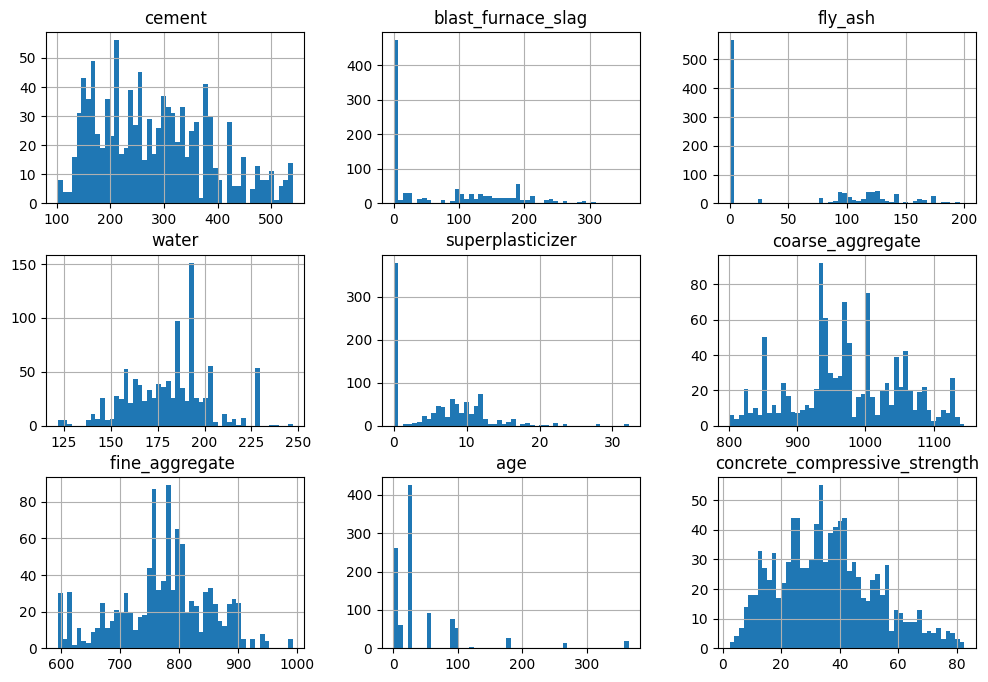

In [ ]:
import matplotlib.pyplot as plt

concrete_df.hist(bins=50, figsize=(12,8))
plt.show()

# Create a Test set


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(concrete_df, test_size=0.8,random_state=42)

In [ ]:
train_set_clean = train_set.copy()

In [ ]:
from sample_data.gain_utils import MCAR2unifo

In [ ]:
train_set = MCAR2unifo(train_set.values, 10)
train_set = pd.DataFrame(train_set, columns=train_set_clean.columns)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         205 non-null    float64
 1   blast_furnace_slag             206 non-null    float64
 2   fly_ash                        205 non-null    float64
 3   water                          206 non-null    float64
 4   superplasticizer               206 non-null    float64
 5   coarse_aggregate               206 non-null    float64
 6   fine_aggregate                 206 non-null    float64
 7   age                            206 non-null    float64
 8   concrete_compressive_strength  206 non-null    float64
dtypes: float64(9)
memory usage: 14.6 KB


# Prepare Data for ML algorithms


In [ ]:
# preprocessing pipeline with standardscaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessing_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

# Fit and transform the data
preprocessed_train_set = preprocessing_pipeline.fit_transform(train_set.copy())

# Convert the result back to a DataFrame for easier inspection
preprocessed_train_set_df = pd.DataFrame(preprocessed_train_set, columns=concrete_df.columns)
preprocessed_train_set_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,1.980825,-0.843491,-0.799720,0.797274,-1.022213,2.044535,-1.968869,2.194084,1.006306
1,-1.203300,1.103813,-0.799720,0.461316,0.650337,-1.339158,1.411443,-0.316189,-0.767829
2,-1.403461,1.388370,-0.799720,0.581659,-0.452443,-0.353272,0.450569,-0.316189,-0.432534
3,-0.288279,-0.843491,-0.799720,0.696988,-1.022213,-0.099290,1.349066,2.194084,-0.517823
4,-1.173784,-0.843491,2.270780,1.800135,0.999550,-1.055135,-0.641695,-0.316189,-1.760694
...,...,...,...,...,...,...,...,...,...
201,0.009656,1.289624,-0.799720,-1.975635,1.036310,0.400481,0.562052,-0.729063,-0.728115
202,-0.354692,-0.843491,1.170123,-2.045835,1.183347,1.522916,0.524891,-0.547399,0.432072
203,-0.875848,-0.843491,1.171698,-0.877503,0.797374,1.416408,0.498347,0.872888,-0.131745
204,1.750225,0.417903,-0.799720,-0.150429,0.613577,-1.681897,0.267419,-0.316189,2.130034


In [ ]:
preprocessed_train_set_df = pd.DataFrame(preprocessed_train_set, columns=concrete_df.columns)
preprocessed_train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         205 non-null    float64
 1   blast_furnace_slag             206 non-null    float64
 2   fly_ash                        205 non-null    float64
 3   water                          206 non-null    float64
 4   superplasticizer               206 non-null    float64
 5   coarse_aggregate               206 non-null    float64
 6   fine_aggregate                 206 non-null    float64
 7   age                            206 non-null    float64
 8   concrete_compressive_strength  206 non-null    float64
dtypes: float64(9)
memory usage: 14.6 KB


In [ ]:
preprocessed_train_set_clean = preprocessing_pipeline.transform(train_set_clean)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'max_iter': [5, 10, 15],
    'estimator__max_depth': [5, 10, 15],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}
# Define the RMSE scoring function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Create a RandomizedSearchCV object
search = RandomizedSearchCV(
    IterativeImputer(estimator=DecisionTreeRegressor(random_state=42), max_iter=10, random_state=0),
    param_distributions=param_distributions,
    n_iter=10,
    scoring=rmse_scorer,
    n_jobs=-1,
    cv=3,
    random_state=0
)

# Fit the RandomizedSearchCV object to the data
search.fit(preprocessed_train_set)

# Meilleurs paramètres trouvés
print("Best Parameters:", search.best_params_)
# Appliquer la transformation et l'imputation
imputed_data= search.best_estimator_.transform(preprocessed_train_set)

Best Parameters: {'max_iter': 10, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 4, 'estimator__max_depth': 5}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
imputed_data_df = pd.DataFrame(imputed_data, columns=preprocessed_train_set_df.columns)
imputed_data_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,1.980825,-0.843491,-0.799720,0.797274,-1.022213,2.044535,-1.968869,2.194084,1.006306
1,-1.203300,1.103813,-0.799720,0.461316,0.650337,-1.339158,1.411443,-0.316189,-0.767829
2,-1.403461,1.388370,-0.799720,0.581659,-0.452443,-0.353272,0.450569,-0.316189,-0.432534
3,-0.288279,-0.843491,-0.799720,0.696988,-1.022213,-0.099290,1.349066,2.194084,-0.517823
4,-1.173784,-0.843491,2.270780,1.800135,0.999550,-1.055135,-0.641695,-0.316189,-1.760694
...,...,...,...,...,...,...,...,...,...
201,0.009656,1.289624,-0.799720,-1.975635,1.036310,0.400481,0.562052,-0.729063,-0.728115
202,-0.354692,-0.843491,1.170123,-2.045835,1.183347,1.522916,0.524891,-0.547399,0.432072
203,-0.875848,-0.843491,1.171698,-0.877503,0.797374,1.416408,0.498347,0.872888,-0.131745
204,1.750225,0.417903,-0.799720,-0.150429,0.613577,-1.681897,0.267419,-0.316189,2.130034


In [ ]:
imputed_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         206 non-null    float64
 1   blast_furnace_slag             206 non-null    float64
 2   fly_ash                        206 non-null    float64
 3   water                          206 non-null    float64
 4   superplasticizer               206 non-null    float64
 5   coarse_aggregate               206 non-null    float64
 6   fine_aggregate                 206 non-null    float64
 7   age                            206 non-null    float64
 8   concrete_compressive_strength  206 non-null    float64
dtypes: float64(9)
memory usage: 14.6 KB


In [ ]:
from sample_data.gain_utils import imputation_rmse

In [ ]:
missing_mask = np.isnan(preprocessed_train_set)

imputation_rmse(preprocessed_train_set_clean, imputed_data, missing_mask)

{'rmse': 0.6125814219416755,
 'mae': 0.4387013391822141,
 'total_missing': 2,
 'missing_percentage': 0.10787486515641855,
 'min_error': 0.011153524887933086,
 'max_error': 0.8662491534764951,
 'std_error': 0.4387013391822141}

In [ ]:
test_set_clean = test_set.copy()

In [ ]:
test_set = MCAR2unifo(test_set.values, 10)
test_set = pd.DataFrame(test_set, columns=test_set_clean.columns)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         824 non-null    float64
 1   blast_furnace_slag             823 non-null    float64
 2   fly_ash                        822 non-null    float64
 3   water                          824 non-null    float64
 4   superplasticizer               823 non-null    float64
 5   coarse_aggregate               824 non-null    float64
 6   fine_aggregate                 824 non-null    float64
 7   age                            824 non-null    float64
 8   concrete_compressive_strength  821 non-null    float64
dtypes: float64(9)
memory usage: 58.1 KB


In [ ]:
# Preprocess the test set

preprocessed_test_set = preprocessing_pipeline.transform(test_set)
preprocessed_test_set_clean = preprocessing_pipeline.transform(test_set_clean)

In [ ]:
# Impute missing values in the test set

imputed_test_set = search.best_estimator_.transform(preprocessed_test_set.copy())

In [ ]:
# Compute the RMSE of the imputed test set

missing_mask_test = np.isnan(preprocessed_test_set)

# Check if there are any missing values in the preprocessed_test_set
if missing_mask_test.any():
	rmse = imputation_rmse(preprocessed_test_set_clean, imputed_test_set, missing_mask_test)
	print(f"RMSE: {rmse}")
else:
	print("No missing values in the preprocessed_test_set to compute RMSE.")

RMSE: {'rmse': 0.6158262621001442, 'mae': 0.4973121437128484, 'total_missing': 7, 'missing_percentage': 0.09439050701186624, 'min_error': 0.2827223488114674, 'max_error': 0.8683070410426428, 'std_error': 0.4535869676457087}
